# Nettoyage des données
Created by: Thomas Durand-Texte, Jan. 2023

# Import des packages

In [26]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
pd.set_option("display.max_columns", 200)
import missingno as msno

import datetime as dt
import scipy.stats as st


import matplotlib.pyplot as plt
import seaborn as sns


import tools
cm = 1./2.54


# Reload module

In [62]:
import importlib
cm = 1./2.54
importlib.reload(tools)
tools.set_theme( white_font=True )
# tools.plot_test_figure()

# Lecture des premières lignes pour vérifier le format

In [3]:
with open('openfood_OC.csv' , 'r') as file:
    line = file.readline()
    print('n \\t: {:}'.format( len(line.split('\t')) ) )
    print(line)
    # print(file.readline())
    # print(file.readline())

n \t: 191
code	url	creator	created_t	created_datetime	last_modified_t	last_modified_datetime	product_name	abbreviated_product_name	generic_name	quantity	packaging	packaging_tags	packaging_en	packaging_text	brands	brands_tags	categories	categories_tags	categories_en	origins	origins_tags	origins_en	manufacturing_places	manufacturing_places_tags	labels	labels_tags	labels_en	emb_codes	emb_codes_tags	first_packaging_code_geo	cities	cities_tags	purchase_places	stores	countries	countries_tags	countries_en	ingredients_text	allergens	allergens_en	traces	traces_tags	traces_en	serving_size	serving_quantity	no_nutriments	additives_n	additives	additives_tags	additives_en	ingredients_from_palm_oil_n	ingredients_from_palm_oil	ingredients_from_palm_oil_tags	ingredients_that_may_be_from_palm_oil_n	ingredients_that_may_be_from_palm_oil	ingredients_that_may_be_from_palm_oil_tags	nutriscore_score	nutriscore_grade	nova_group	pnns_groups_1	pnns_groups_2	food_groups	food_groups_tags	food_groups_en	states	sta

# chargement des données

In [16]:
dtype = { 'additives': 'object' , 'abbreviated_product_name': 'object', 'allergens': 'object', 'cities_tags': 'object', 'code': 'object', 'ecoscore_grade_fr': 'object', 'emb_codes': 'object', 'emb_codes_tags': 'object', 'first_packaging_code_geo': 'object', 'food_groups': 'object', 'food_groups_en': 'object', 'food_groups_tags': 'object', 'generic_name': 'object', 'ingredients_from_palm_oil_tags': 'object', 'ingredients_that_may_be_from_palm_oil_tags': 'object', 'manufacturing_places': 'object', 'manufacturing_places_tags': 'object', 'origins': 'object', 'origins_en': 'object', 'origins_tags': 'object', 'packaging_text': 'object', 'purchase_places': 'object', 'traces': 'object', 'traces_en': 'object', 'traces_tags': 'object'}
data = dd.read_csv('openfood_OC.csv', delimiter ='\t', dtype=dtype)
data = data.compute()

# data = pd.read_csv('openfood_OC.csv', delimiter='\t', dtype=dtype)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0729950200110,http://world-en.openfoodfacts.org/product/0729...,usda-ndb-import,1489137181,2017-03-10T09:13:01Z,1637334604,2021-11-19T15:10:04Z,Plantain Chips,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top Banana,top-banana,"Plantain chips, Chips","en:chips,en:plantain-chips","Chips,Plantain-chips",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Plantains, vegetable oil (cotton seed oil and/...",NaN,NaN,NaN,NaN,NaN,28 g (32 CHIPS) | (ABOUT),28.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,11.0,d,3.0,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,en:plantain-chips,P

# Visiualisation of NaN with missingno
as barplot 

<AxesSubplot: >

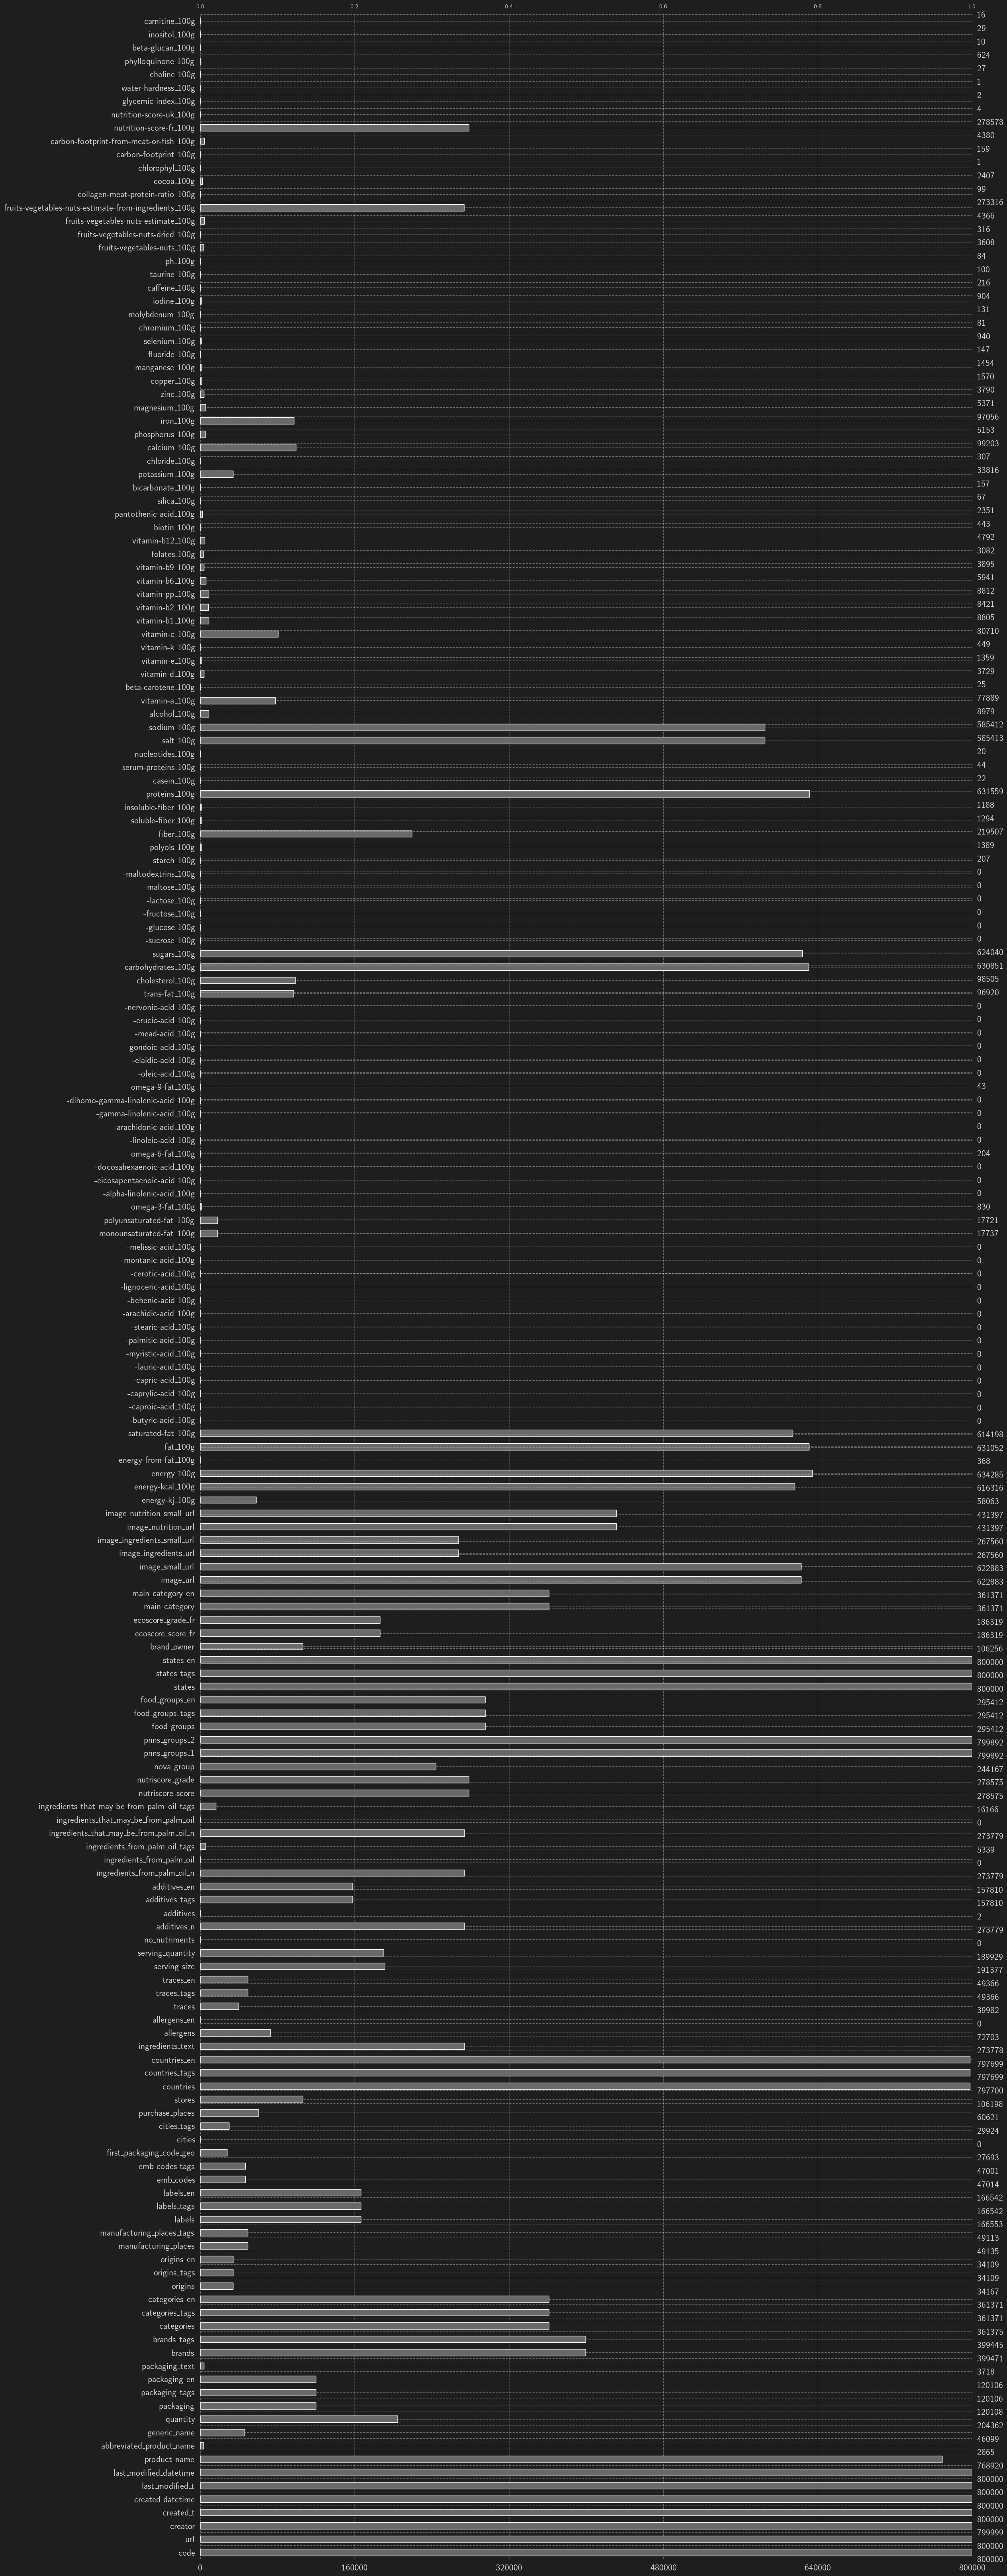

In [5]:
msno.bar( data )

# remove empty and some usused/unusable? columns

In [20]:
n = len(data) # number of samples
sum_isnull = data.isnull().sum() # number of null data for each column

In [38]:
# lst of keywords for categories that must be kept
keep_keys = ['score', 'origins', 'brands', 'labels', 'allergens', 'additives', 'palm']
# lst of keywords for categories that must be dropped
drop_keys = ['image', 'url']

n_null_lim_drop = int(0.9*n)


categories_full = sum_isnull[ sum_isnull == 0].index.to_list()
print('\nFull categories:', categories_full)

categories_hollow = sum_isnull[ sum_isnull > n_null_lim_drop].index.to_list()
print('\nHollow categories:', categories_hollow)

other_removed_cat = tools.lst_str_keep_items_containing_key( data.keys() , drop_keys )
print('\nother removed categories:', other_removed_cat )

removed_cat = tools.lst_str_remove_items_containing_key( categories_hollow + other_removed_cat , keep_keys )

# check is completely empty categories remains
removed_cat += [ key for key in sum_isnull[ sum_isnull == n].index.to_list() if not key in removed_cat ]

# check for dupplicate entry
removed_cat = [ key for i, key in enumerate( removed_cat ) if not key in removed_cat[:i] ]

# check if key are still in DataFrame
removed_cat = [key for key in removed_cat if key in data.keys()]
print('\nRemoved categories:', removed_cat )



if True: data.drop( columns=removed_cat, inplace=True )

# msno.bar( data )


Full categories: ['code', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'states', 'states_tags', 'states_en']

Hollow categories: ['abbreviated_product_name', 'generic_name', 'packaging_text', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'no_nutriments', 'additives', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'energy-kj_100g', 'energy-from-fat_100g', '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g', '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g', '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-

# Visualisation of NaN for new DataFrame

<AxesSubplot: >

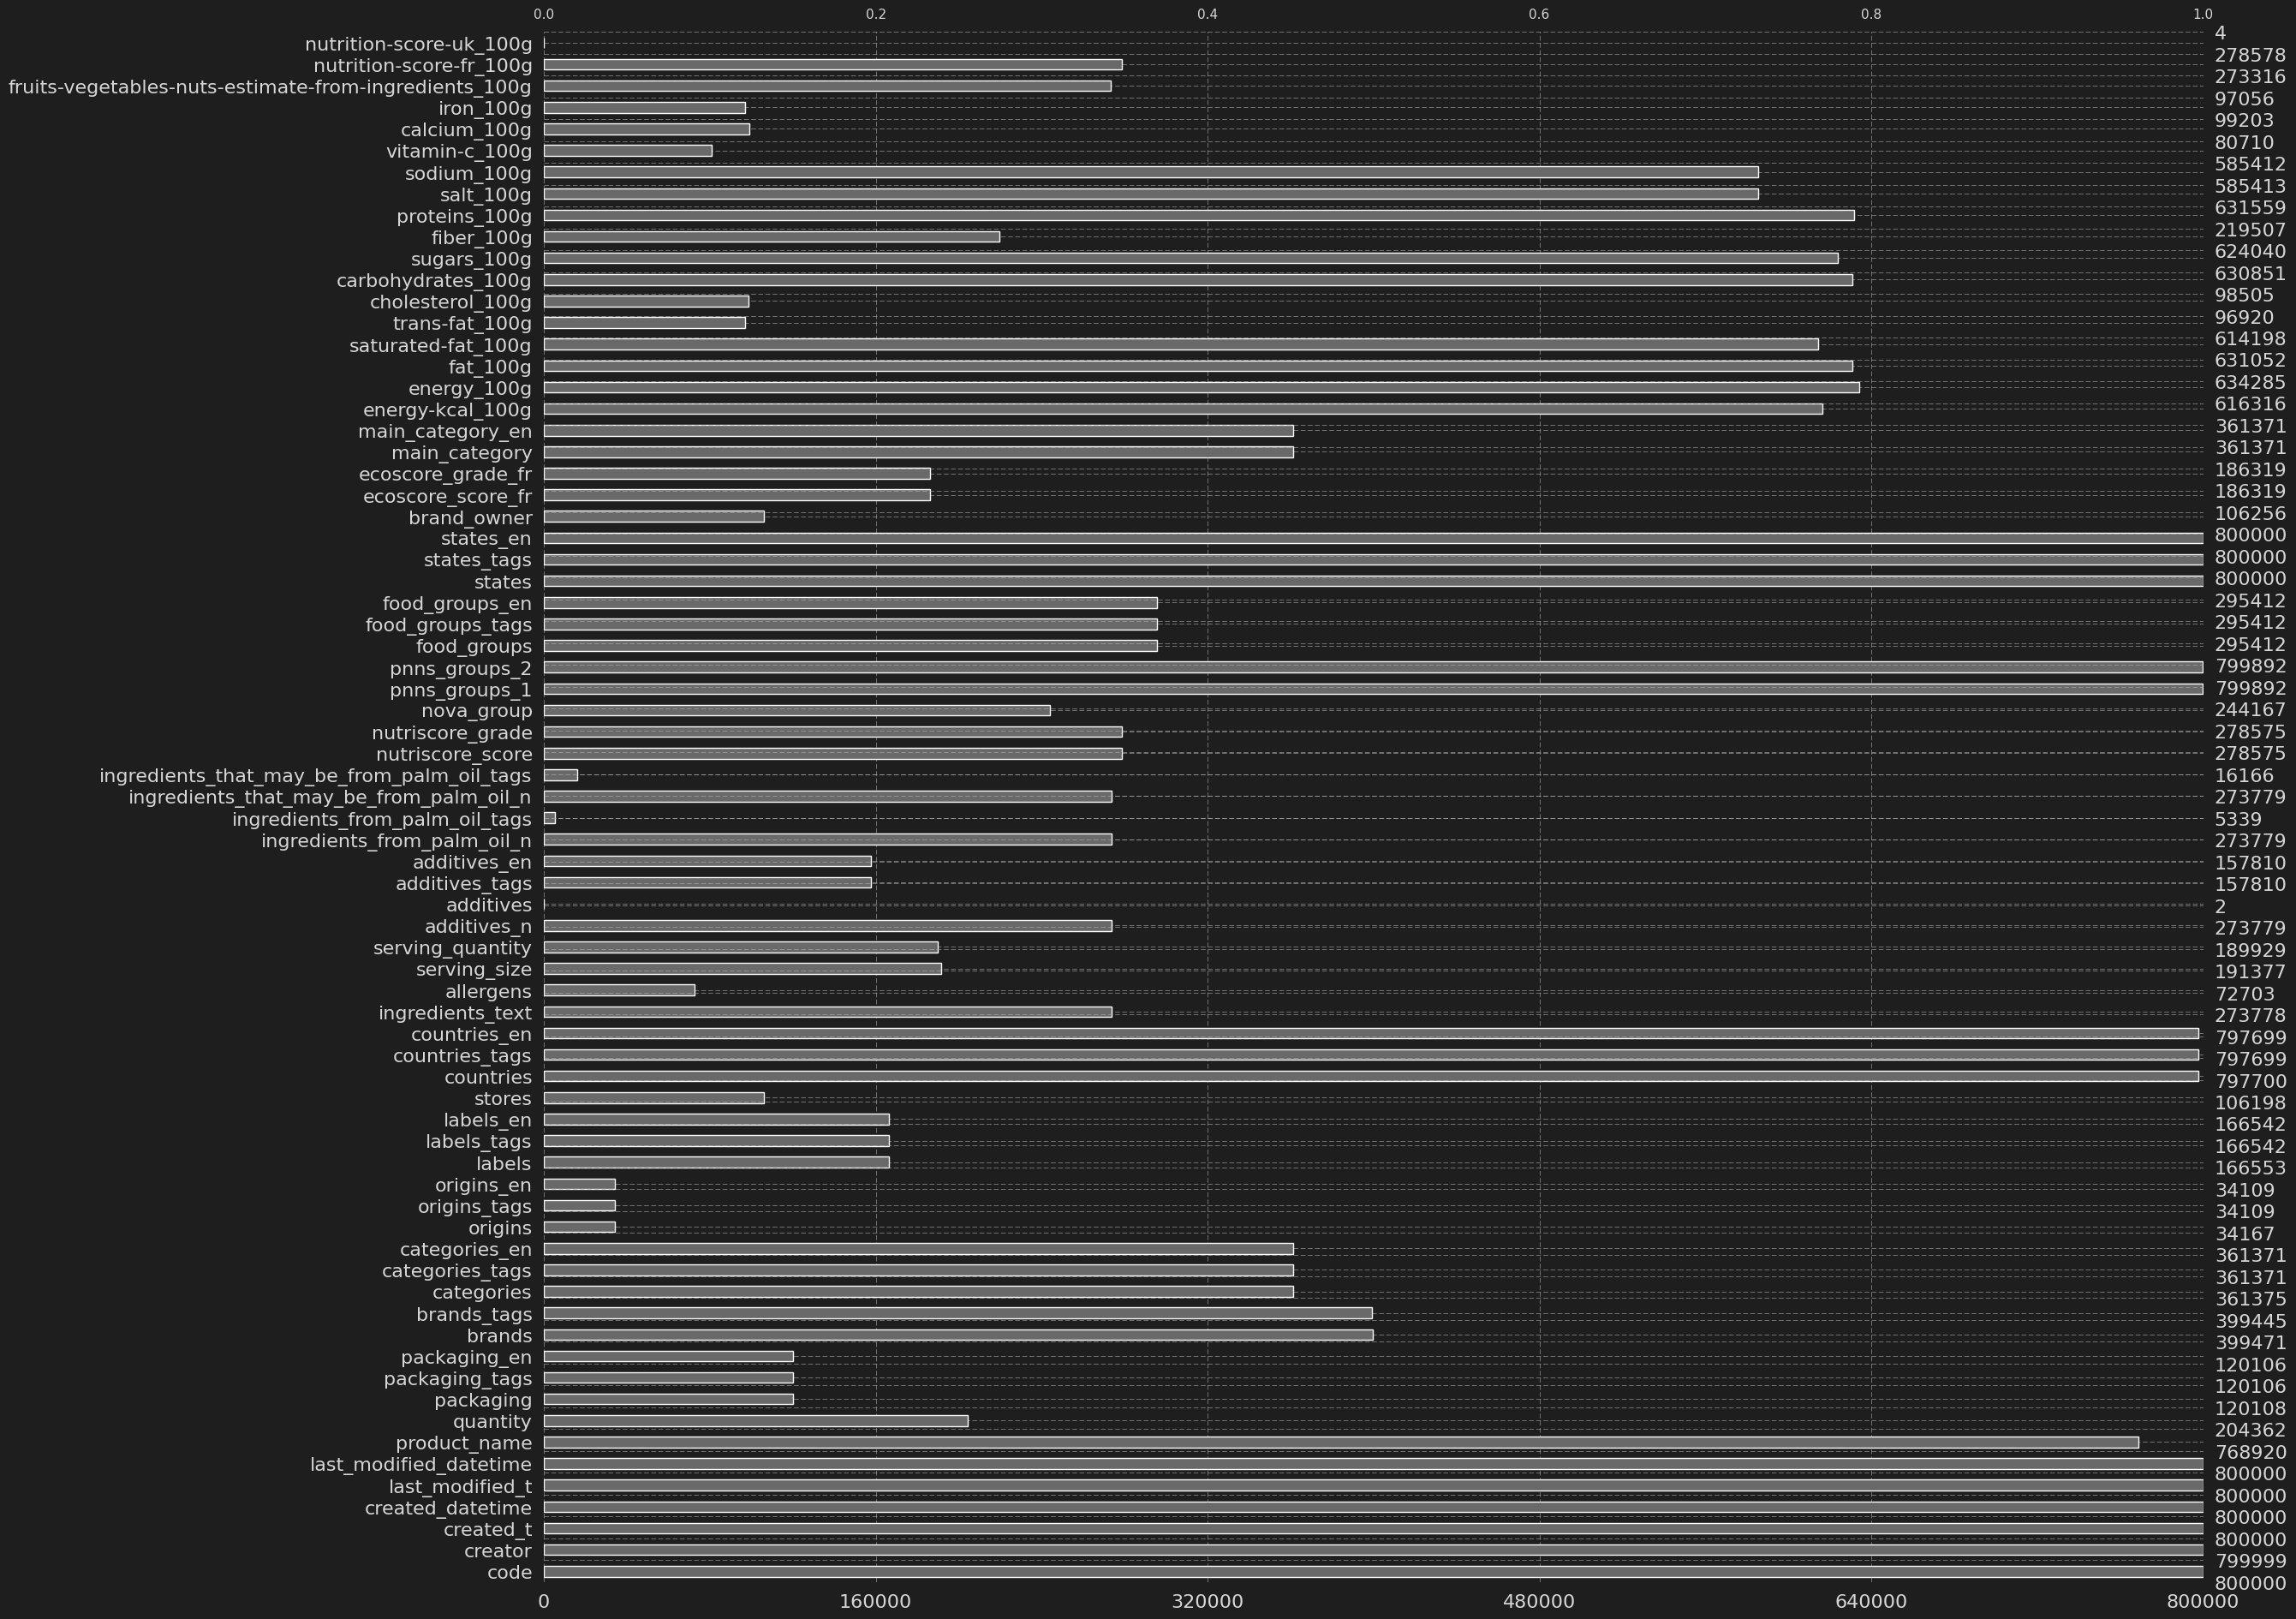

In [39]:
msno.bar( data )

# Heatmap without fully filled categories

<AxesSubplot: >

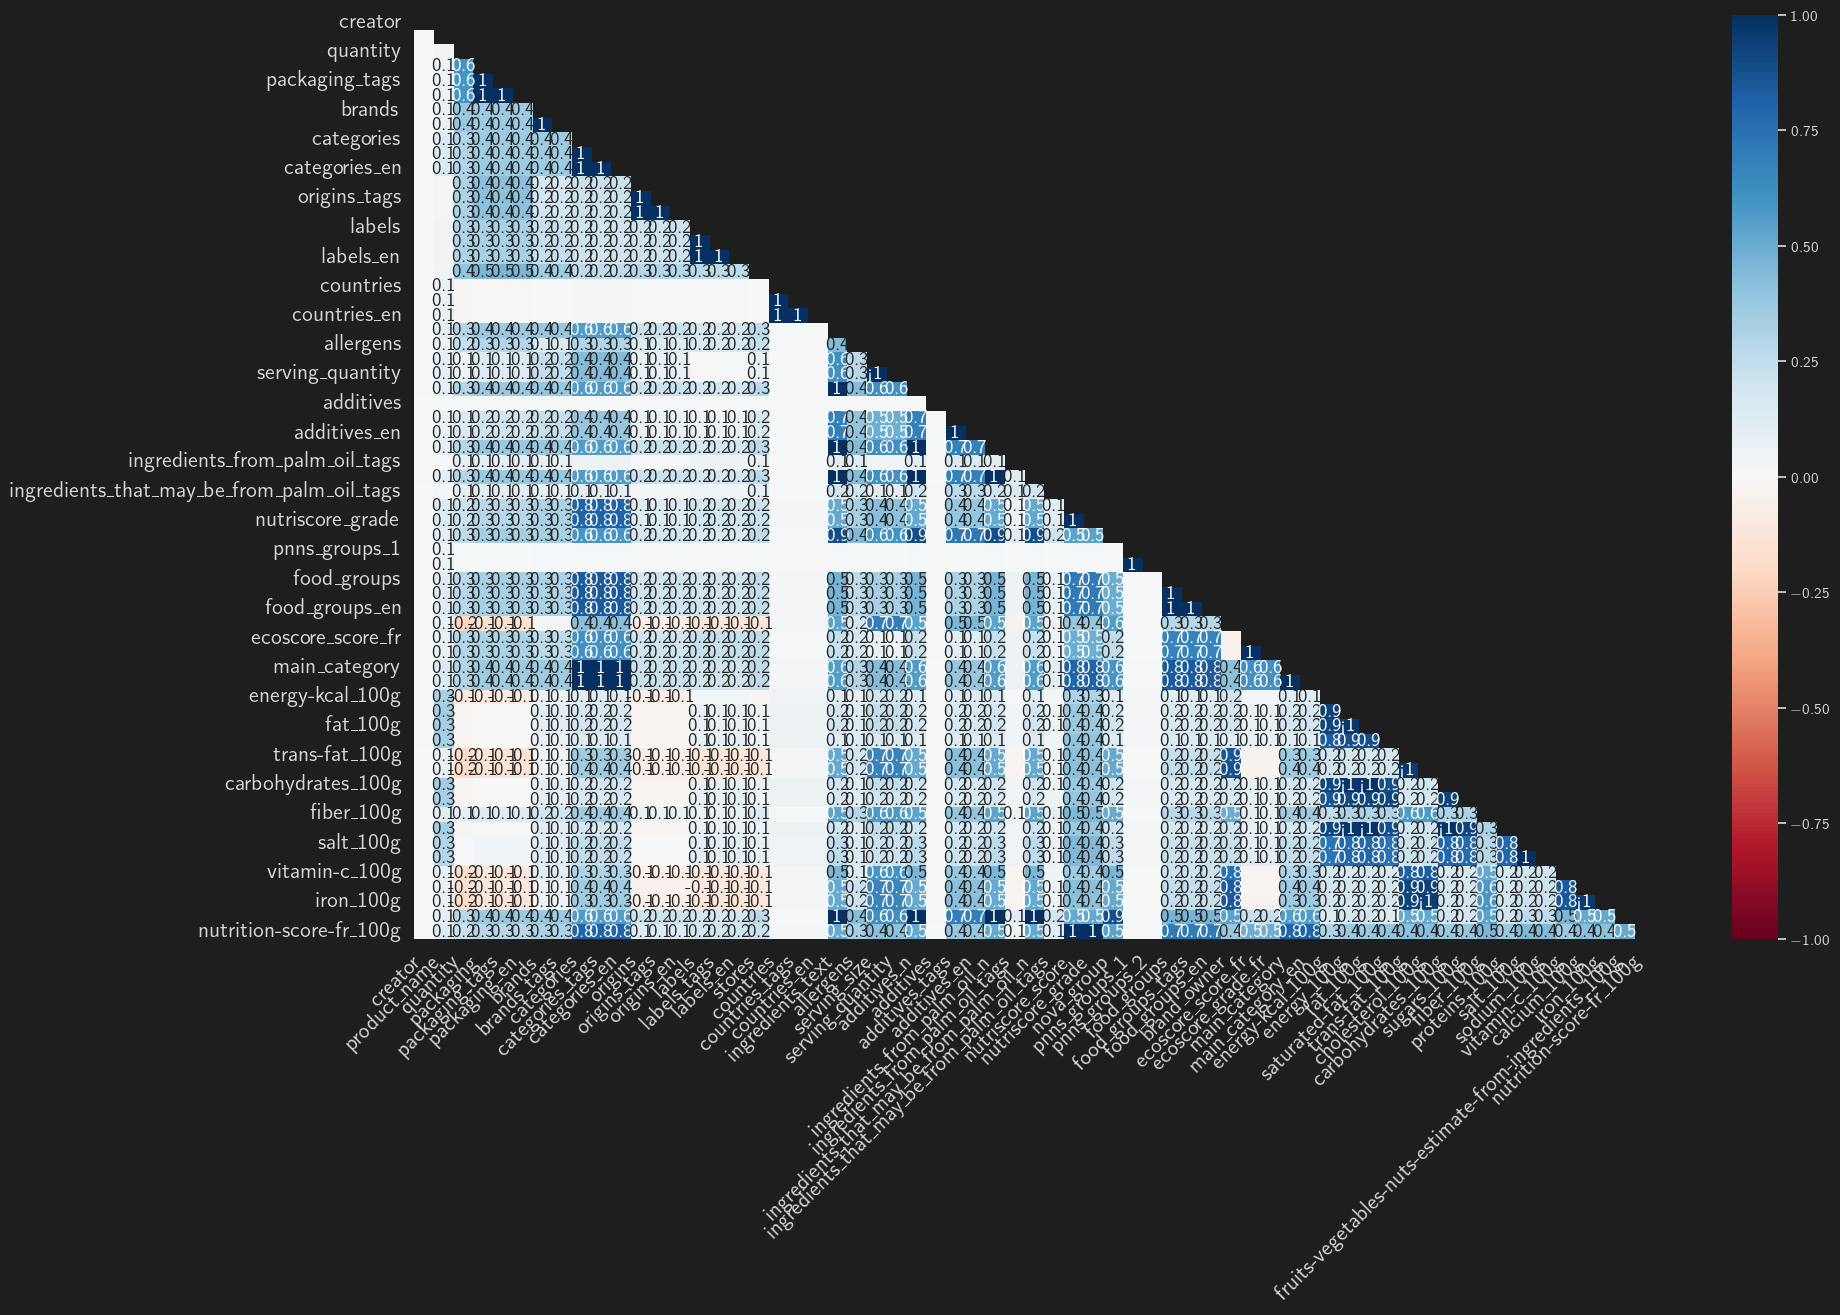

In [9]:
msno.heatmap( data[ [key for key in data.keys() if (not key in categories_full)] ] )

# Heatmap without fully filled categories (qualitatives + nutriscore)

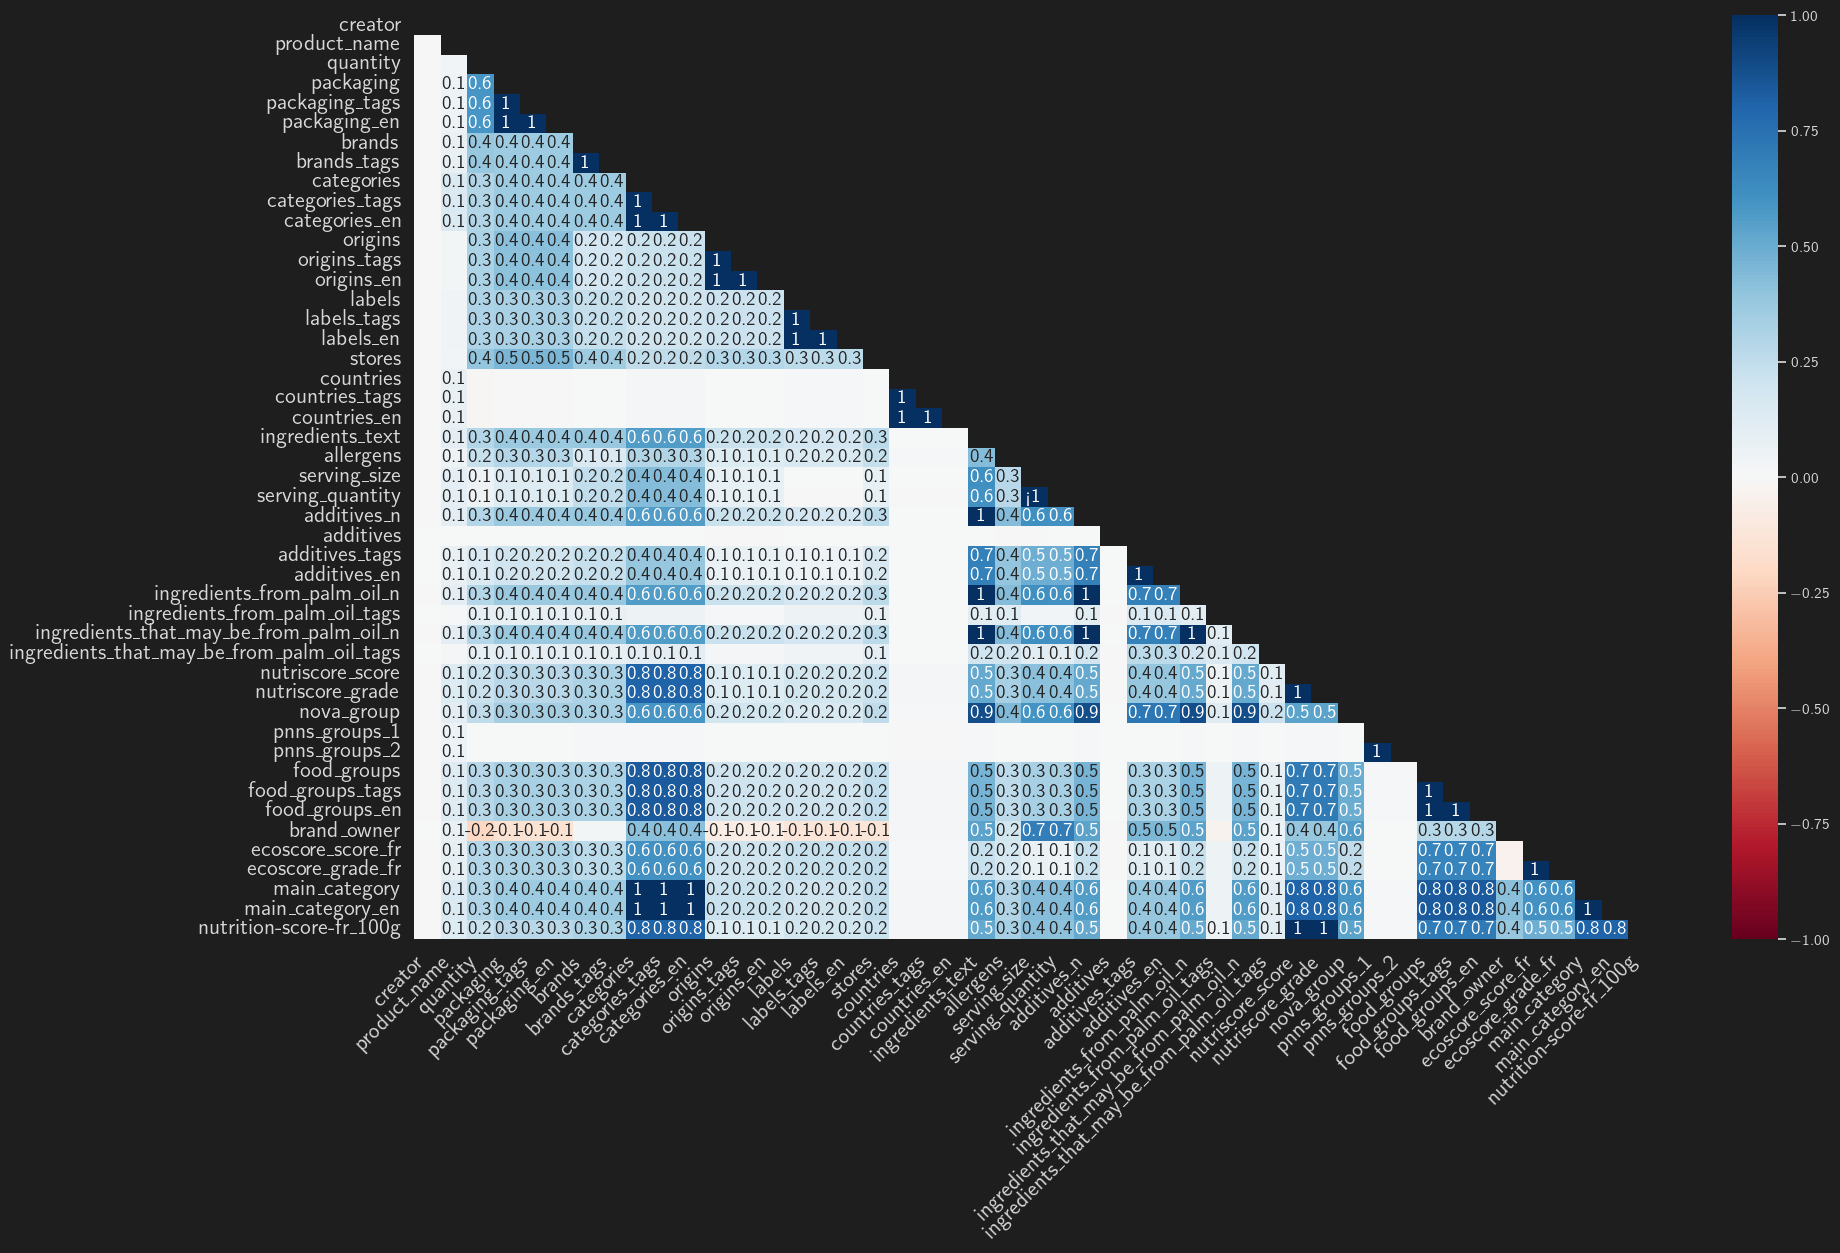

In [10]:
ax = msno.heatmap( data[ [key for key in data.keys() if (not key in categories_full) and (not '_100g' in key) or 'score' in key] ] )

# DTYPES

In [11]:
with pd.option_context('display.max_rows', None):
    display(data.dtypes)

code                                                      object
creator                                                   object
created_t                                                  int64
created_datetime                                          object
last_modified_t                                            int64
last_modified_datetime                                    object
product_name                                              object
quantity                                                  object
packaging                                                 object
packaging_tags                                            object
packaging_en                                              object
brands                                                    object
brands_tags                                               object
categories                                                object
categories_tags                                           object
categories_en            

# Listes des catégories: string / float64 / others

In [43]:
categories_float, categories_others = [], []
for cat in data.keys():
    if data.dtypes[cat] == 'float64': categories_float.append( cat )
    else: categories_others.append( cat )

categories_string = []
# print('\nstrings to lowercase')
for key in categories_others: 
    # print(key, 'type', data[key].dtype)
    if data[key].dtype != 'object': continue
    categories_string.append( key )
    data[key].str.lower()

print("float categories:", categories_float )
print("\nstring categories:", categories_string )
print("\nothers categories:", categories_others )


float categories: ['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'nova_group', 'ecoscore_score_fr', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']

string categories: ['code', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'packaging_en', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'labels', 'labels_tags', 'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'serving_size', 'additives', 'additives_tags', 'add

# Analyse variables string

In [64]:
string_catergories_to_value_count = ['code', 'labels_en', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2']
nulls = data[string_catergories_to_value_count].isnull()
for key in string_catergories_to_value_count:
    print('\n', key, data.dtypes[key])
    n = 0
    for value, isnull in zip( data[key] , nulls[key] ) :
        if isnull : continue
        print(value)
        n += 1
        if n == 10: break
dico_value_counts = { key: tools.value_count_labels_in_string_series( data.loc[~nulls[key],key] , ',' ) for key in string_catergories_to_value_count }


 code object
0729950200110
8033772094078
5051399833019
3299342248325
0840379101768
0021000077366
8437002411312
8690985518403
3760279200699
0850008457166

 labels_en object
Organic
No gluten
Organic,Made in France
Organic
No preservatives,Haute Valeur Environnementale
Low or no sugar,No sugar
Organic,EU Organic,No colorings,AB Agriculture Biologique
No gluten
Organic,EU Organic,FR-BIO-01
Made in Germany

 nutriscore_grade object
d
e
d
a
d
b
b
b
a
d

 pnns_groups_1 object
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown

 pnns_groups_2 object
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown


,code,labels_en,nutriscore_grade,pnns_groups_1,pnns_groups_2
0,799996,10204,5,11,41



labels examples:
 ['Organic', 'No gluten', 'Made in France', 'No preservatives', 'Haute Valeur Environnementale', 'Low or no sugar', 'No sugar', 'EU Organic', 'No colorings', 'AB Agriculture Biologique'] 



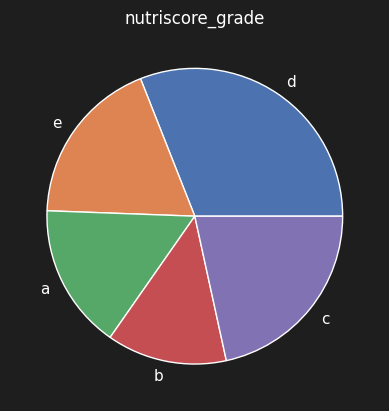

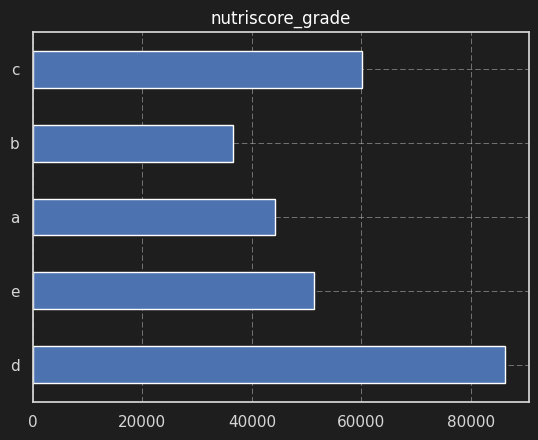

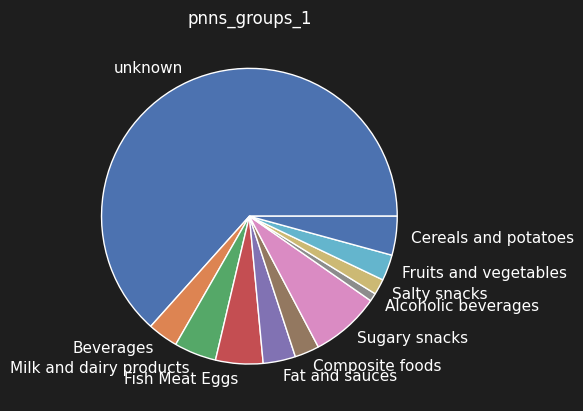

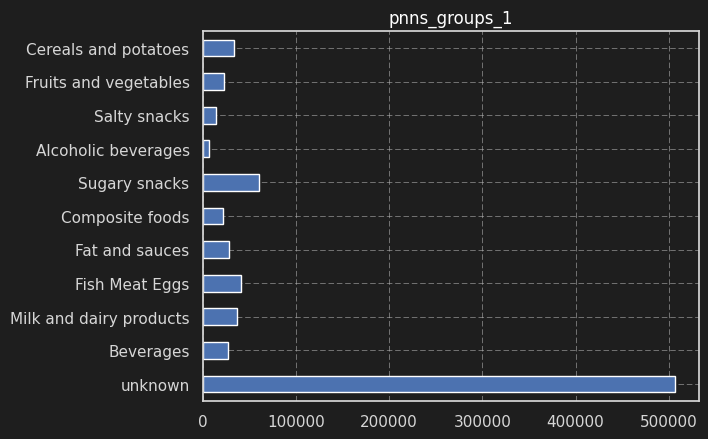

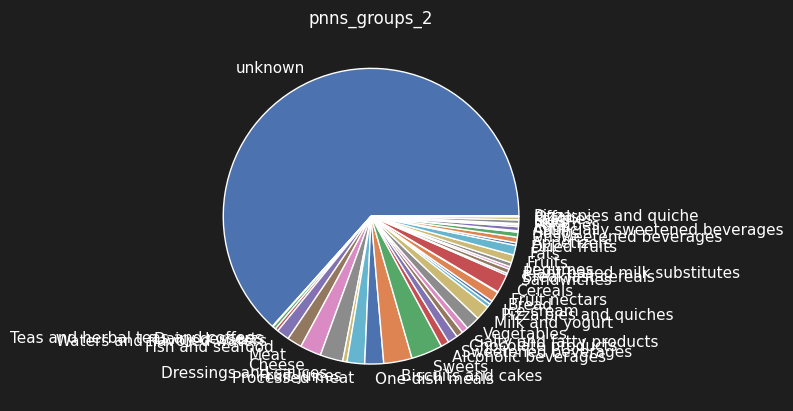

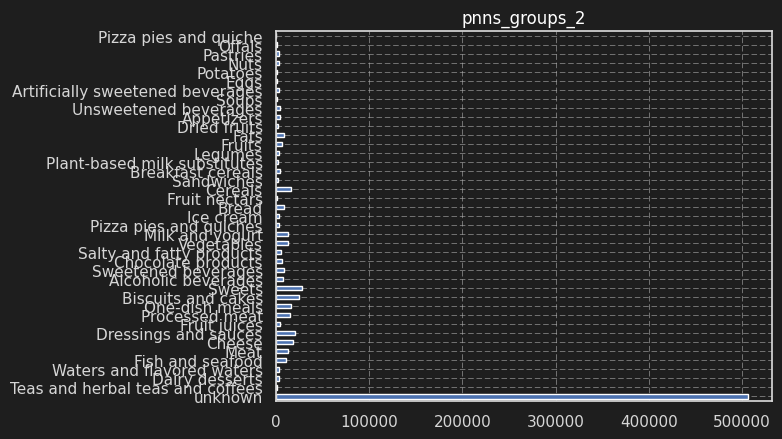

In [90]:
data_value_counts = pd.DataFrame( {key:[len(dico_value_counts[key])] for key in string_catergories_to_value_count} )
display(data_value_counts)
# data_value_counts.plot( kind='bar' )

# print('min counts', data_value_counts.iloc[0,:].min() )

print('\nlabels examples:\n', list( dico_value_counts['labels_en'].keys() )[:10] , '\n')

for key in string_catergories_to_value_count:
    if data_value_counts[key][0] > 50: continue
    fig, ax = plt.subplots()
    pd.Series( dico_value_counts[key] ).plot( kind='pie' , ax=ax )
    ax.set_title(key)

    fig, ax = plt.subplots()
    pd.Series( dico_value_counts[key] ).plot( kind='barh' , ax=ax )
    ax.set_title(key)

if False: # barplot
    cat_pos = np.arange( len(string_catergories_to_value_count) )
    print(cat_pos)
    fig, ax = plt.subplots( figsize=(20*cm,10*cm))
    if True: # horizontal
        ax.bar( cat_pos, data_value_counts.iloc[0,:] , align='center')
        ax.set_xticks(cat_pos, labels=string_catergories_to_value_count)
    else:
        ax.barh( cat_pos, data_value_counts.iloc[0,:] , align='center')
        ax.set_yticks(cat_pos, labels=string_catergories_to_value_count)
        ax.invert_yaxis()  # labels read top-to-bottom

    fig.tight_layout()
    del cat_pos


# Analyse variables float

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,1.899290e+05,273779.000000,273779.000000,273779.000000,278575.000000,244167.000000,186319.000000,6.163160e+05,627378.00000,6.310520e+05,6.141980e+05,96920.000000,98505.000000,6.308510e+05,6.240400e+05,2.195070e+05,6.315590e+05,5.854130e+05,5.854120e+05,80710.000000,9.920300e+04,97056.000000,273316.000000,278578.000000,4.000000
mean,4.541139e+07,2.019019,0.019750,0.069965,9.121296,3.397445,43.360366,1.765230e+08,1109.93770,1.744705e+08,1.627096e+05,0.122302,0.056417,1.584378e+05,1.604063e+08,4.552631e+05,1.582406e+05,1.707070e+05,6.828290e+04,0.056126,2.016469e+03,0.008633,8.572664,9.121391,19.750000
std,1.931123e+10,2.884767,0.140938,0.303732,8.848561,0.985914,25.769897,1.278597e+11,770.15859,1.384715e+11,1.275127e+08,8.731580,1.567523,1.258185e+08,1.265884e+11,2.132964e+08,1.257479e+08,1.306100e+08,5.224406e+07,5.241345,6.349910e+05,0.450262,36.811276,8.848580,6.652067
min,0.000000e+00,0.000000,0.000000,0.000000,-15.000000,1.000000,-30.000000,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,-2.000000e+01,-5.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.000260,0.000000,-15.000000,10.000000
25%,2.800000e+01,0.000000,0.000000,0.000000,1.000000,3.000000,27.000000,1.010000e+02,418.00000,8.000000e-01,1.000000e-01,0.000000,0.000000,3.521127e+00,6.000000e-01,0.000000e+00,1.330000e+00,8.250000e-02,3.300000e-02,0.000000,0.000000e+00,0.000000,0.000000,1.000000,19.000000
50%,5.500000e+01,1.000000,0.000000,0.000000,10.000000,4.000000,38.000000,2.600000e+02,1067.00000,7.000000e+00,1.800000e+00,0.000000,0.000000,1.540000e+01,3.570000e+00,1.600000e+00,6.000000e+00,5.875000e-01,2.350000e-01,0.000000,3.600000e-02,0.001000,0.000000,10.000000,22.000000
75%,1.133981e+02,3.000000,0.000000,0.000000,16.000000,4.000000,65.000000,4.000000e+02,1661.00000,2.130000e+01,7.100000e+00,0.000000,0.022000,5.300000e+01,1.750000e+01,3.600000e+00,1.250000e+01,1.400000e+00,5.600000e-01,0.004000,1.100000e-01,0.002450,0.500000,16.000000,22.750000
max,8.414808e+12,49.000000,3.000000,5.000000,40.000000,4.000000,125.000000,1.000000e+14,3556.00000,1.100000e+14,9.993273e+10,1666.000000,127.000000,9.993273e+10,1.000000e+14,9.993273e+10,9.993273e+10,9.993273e+10,3.997309e+10,1400.000000,2.000000e+08,120.000000,13461.000000,40.000000,25.000000
IQ,8.539809e+01,3.000000,0.000000,0.000000,15.000000,1.000000,38.000000,2.990000e+02,1243.00000,2.050000e+01,7.000000e+00,0.000000,0.022000,4.947887e+01,1.690000e+01,3.600000e+00,1.117000e+01,1.317500e+00,5.270000e-01,0.004000,1.100000e-01,0.002450,0.500000,15.000000,3.750000


,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,1.899290e+05,273779.000000,273779.000000,273779.000000,278575.000000,244167.000000,186319.000000,6.163160e+05,627284.000000,6.310520e+05,6.141980e+05,96920.000000,98505.000000,6.308510e+05,6.240400e+05,2.195070e+05,6.315590e+05,5.854130e+05,5.854120e+05,80710.000000,9.920300e+04,97056.000000,273316.000000,278578.000000,4.000000
mean,4.541139e+07,2.019019,0.019750,0.069965,9.121296,3.397445,43.360366,1.765230e+08,1109.573289,1.744705e+08,1.627096e+05,0.122302,0.056417,1.584378e+05,1.604063e+08,4.552631e+05,1.582406e+05,1.707070e+05,6.828290e+04,0.056126,2.016469e+03,0.008633,8.572664,9.121391,19.750000
std,1.931123e+10,2.884767,0.140938,0.303732,8.848561,0.985914,25.769897,1.278597e+11,769.640707,1.384715e+11,1.275127e+08,8.731580,1.567523,1.258185e+08,1.265884e+11,2.132964e+08,1.257479e+08,1.306100e+08,5.224406e+07,5.241345,6.349910e+05,0.450262,36.811276,8.848580,6.652067
min,0.000000e+00,0.000000,0.000000,0.000000,-15.000000,1.000000,-30.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,-2.000000e+01,-5.000000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,-0.000260,0.000000,-15.000000,10.000000
25%,2.800000e+01,0.000000,0.000000,0.000000,1.000000,3.000000,27.000000,1.010000e+02,418.000000,8.000000e-01,1.000000e-01,0.000000,0.000000,3.521127e+00,6.000000e-01,0.000000e+00,1.330000e+00,8.250000e-02,3.300000e-02,0.000000,0.000000e+00,0.000000,0.000000,1.000000,19.000000
50%,5.500000e+01,1.000000,0.000000,0.000000,10.000000,4.000000,38.000000,2.600000e+02,1067.000000,7.000000e+00,1.800000e+00,0.000000,0.000000,1.540000e+01,3.570000e+00,1.600000e+00,6.000000e+00,5.875000e-01,2.350000e-01,0.000000,3.600000e-02,0.001000,0.000000,10.000000,22.000000
75%,1.133981e+02,3.000000,0.000000,0.000000,16.000000,4.000000,65.000000,4.000000e+02,1661.000000,2.130000e+01,7.100000e+00,0.000000,0.022000,5.300000e+01,1.750000e+01,3.600000e+00,1.250000e+01,1.400000e+00,5.600000e-01,0.004000,1.100000e-01,0.002450,0.500000,16.000000,22.750000
max,8.414808e+12,49.000000,3.000000,5.000000,40.000000,4.000000,125.000000,1.000000e+14,3525.000000,1.100000e+14,9.993273e+10,1666.000000,127.000000,9.993273e+10,1.000000e+14,9.993273e+10,9.993273e+10,9.993273e+10,3.997309e+10,1400.000000,2.000000e+08,120.000000,13461.000000,40.000000,25.000000


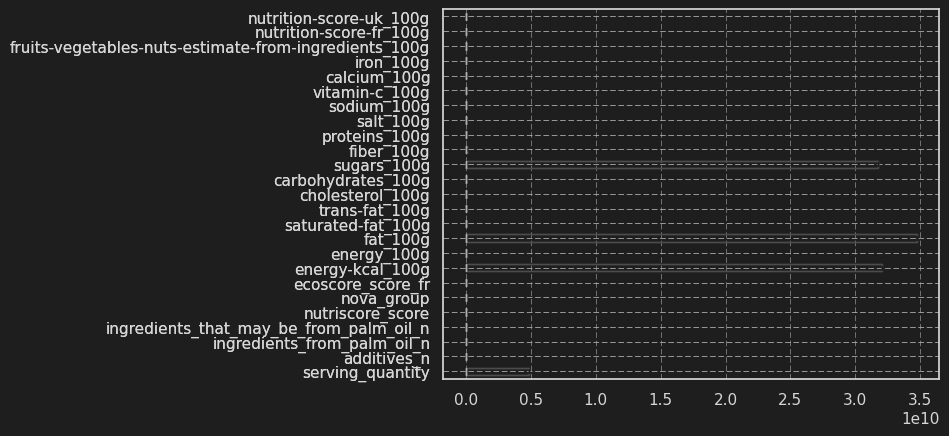

In [123]:
df_describe = data[categories_float].describe()
df_describe.boxplot( showfliers=False, vert=False )

IQs = df_describe.loc['75%', :] - df_describe.loc['25%', :]


# display(IQs)
df_describe = pd.concat( (df_describe, IQs.to_frame().T) , ignore_index=False )
df_describe.rename( index={0:'IQ'}, inplace=True )
display( df_describe )

key = 'energy_100g'
data.loc[ data[key] > df_describe[key]['75%'] + 1.5*df_describe[key]['IQ'] , key ] = np.nan

df_describe = data[categories_float].describe()
df_describe.boxplot( showfliers=False, vert=False )
display( df_describe )


# END OF NOTEBOOK

In [16]:
fig = ax.get_figure()
fig.tight_layout()
tools.savefig( fig, 'Figures/test' )